# Analiza knjig

Projektna naloga vsebuje analizo podatkov knjige, ter njene vsebine. Knjige so zbrane iz strani [Project Gutenberg](https://www.gutenberg.org/), ki vsebuje več kot 60 000 strani, v našem primeru, pa se bom osredotočil le na zvrst
`Fiction`, ki pa ima okoli 6000 knjig. Zaradi težavnosti analize knjig iz drugih jezikov, se bom pri pri tem omejil na knjige, ki so napisane v angleščini.

## Predpriprava:

In [1]:
import pandas as pd
import os
from collections import Counter
import json
import itertools

%matplotlib inline

book_data = pd.read_csv('processed_data/book_data.csv', index_col = 'id', header=0)
category_data = pd.read_csv('processed_data/category_data.csv', index_col = 'book_id', header=0)
# subject_data = pd.read_csv('processed_data/subject_data.csv', index_col = 'id', header=0)

pd.options.display.max_rows = 50

In [2]:
def read_book(id):
    with open(os.path.join('processed_data/books', str(id) + '.txt'), 
              'r',
              encoding='utf-8') as book_file:
        return book_file.read()
    
def get_tokenized_book(id):
    with open(os.path.join('processed_data/tokenized_books', str(id) + '.json'), encoding="utf-8") as j_file:
        book = json.loads(j_file.read())
    return book
        

Pripravimo nekaj knjižnic, ter iz csv datotek naložimo tabele. Hkrati definiramo funkcijo `read_book`, ki bo iz `id` knjige vrnila njeno vsebino, ter `get_tokenized_book`, ki vrne tabelo besed, ki vsebuje vse besede iz dane knjige razen tistih, ki so v angleščini prepogosto in se posledično pojavljajo v vsaki knjigi.

## Podatki s katerimi bomo delali

In [3]:
book_data

,title,author,release_date
id,,,
1222,Cobb's Anatomy,Irvin S. Cobb,1998
36089,Back at School with the Tucker Twins,Nell Speed,2011
59665,A Toothache on Zenob,Boyd Ellanbee,2019
12215,"Project Gutenberg, Odd Craft, by W.W. Jacobs",W.W. Jacobs,2006
42562,Mason of Bar X Ranch,Henry Bennett,2013
...,...,...,...
43326,"Joe Miller's Jests, With Copious Additions",Various,2013
34304,The Complete Story of the Galveston Horror,Various,2010
39757,Half-Hours with Jimmieboy,John Kendrick Bangs,2012


`book_data` vsebuje podatke o vseh knjigah, ki so naložene. `id` je ključ knjige, ki se ujema z identifikacijo, ki jo uporablja Gutenberg. `title` se očitno nanaša na naslov knjige in `author` na avtorja, `release_date` pa seveda
na datum izdaje knjige, kot je označen na spletni strani od Project Gutenberg. Knjige za katere datum izdaje ni bil specificiran imajo `release_date` enak 0.

In [4]:
category_data

,category
book_id,
2701,Adventure
76,Adventure
74,Adventure
521,Adventure
61168,Adventure
...,...
19120,Western
41802,Western
26911,Western


`category_data` vsebuje povezavo med knjigami ter zvrstmi. Pri tem vsaka knjiga pripada natanko eni zvrsti, kar pa sicer za majhno število knjig (manj kot 100) ni res, zato je bila v teh primerih izbrana le ena od zvrsti.
`book_id` se tukaj nanaša na `id` iz `book_data`, `category` pa je niz, ki pove ime zvrsti.

## Analiza podatkov

### 1. Število knjig posamezne zvrsti

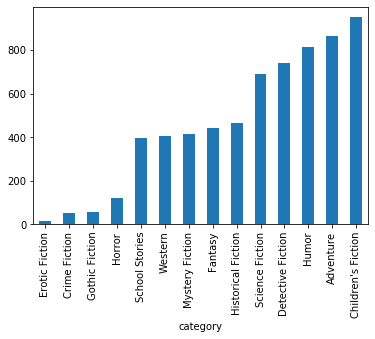

In [5]:
category_data.groupby('category').size().sort_values(ascending = True).plot.bar(x = 'zvrst', y = 'pojavitve')

Stolpični diagram pokaže koliko knjig neke zvrsti je bilo napisanih. Advanturističnih knjig jem kot bi bilo pričakovati, veliko, me pa preseneča, da je tako veliko število otroških knjig. Po drugi strani je presenetljivo tudi, relativno majhna količina fantazijskih knjig. Zvrsti, ki vsebujejo zelo malo knjig po drugi strani večino niso presenetljive, izjema so kriminalke, vendar je možno, da Project Gutenberg klasificira veliko število knjig, ki bi lahko spadale ali pod kriminalke ali pod detektivke pod detektivke.

### 2. Število izdanih knjig po letu

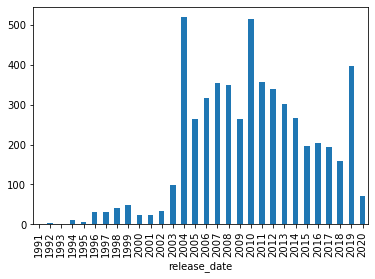

In [6]:
book_data[book_data.release_date > 0].groupby('release_date').size().plot.bar()

Diagram nam pokaže število knjig naloženih na spletno stran v posameznem letu. 

Bolj kot o knjigah ta diagram pove več o delovanju podjetja, saj je očitno okoli leta 2004 stran začela dobivati veliko več knjig iz fikcije. To je po podatkih iz knjige [Project Gutenberg](https://www.gutenberg.org/ebooks/27045) smiselno saj se je v tistem obdobju močno povečalo število digitaliziran knjig na mesec, ki je bilo do leta 2001: 104 knjige na mesec, leta 2004 pa 338 vsak mesec.

Kljub temu se za to leto rezultati ne ujemajo popolnoma (število izdanih knjig vsak mesec se je približno potrojilo število izdanih v letu pa je bilo šestkrat večje), vendar je to verjetno leto, ki je slučajno odstopalo, saj če gledamo kasnejša leta se število knjig približno ujema s to povečano količino.

### 3. Povprečna dolžina knjige v letu

In [7]:
def book_length(i):
    return len(read_book(i))

def avg_book_length(ids):
    return sum(len(read_book(i)) for i in ids) / len(ids)

Definiramo funkciji `book_length`, ki nam pove število besed v knjigi z danim `id` ter `avg_book_length`, ki nam vrne povprečno dolžino knjig danih z njihovimi ključi. 

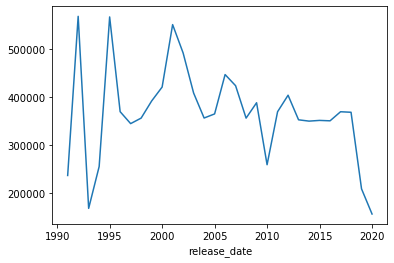

In [8]:
id_in_year = book_data[book_data.release_date > 0].reset_index().groupby('release_date').id.agg(avg_book_length)
id_in_year.plot()

Graf prikaže povprečno število besed v knjigi znotraj danega leta.

Kljub relativno velikim odmikom v posameznih letih zgleda da je število knjig približno 400 000 besed.

Graf je najbolj kaotičen med leti 1990 in 1995, kar je že iz diagrama števila knjig v posameznem letu (2.) očitno, saj je bilo tista leta relativno malo knjig in je potem vsaka imela veliko večji vpliv na povprečno število besed
v letu.

Ker se je leto 2020 šele dobro začelo, pa je seveda tam zelo velik padec.

### 4. Povprečna število strani

#### 4.1. Povprečno število strani vseh knjig

In [9]:
# Assuming there are about 400 words per page
def page_nums(book_id):
    book = read_book(book_id)
    return len(book) / 400

In [10]:
book_data.reset_index().id.apply(page_nums).mean()

884.103922421606

#### 4.2. Povprečno število strani posamezne zvrsti

In [11]:
book_with_categories = pd.merge(book_data.reset_index(), category_data, left_on='id', right_on='book_id')
book_with_categories['id'] = book_with_categories.id.apply(page_nums)
book_with_categories.groupby('category').id.mean()

category
Adventure             1095.640754
Children's Fiction     864.628249
Crime Fiction         1235.355660
Detective Fiction      894.223007
Erotic Fiction         989.888529
Fantasy                711.100176
Gothic Fiction        1461.917098
Historical Fiction    1436.742505
Horror                 889.403424
Humor                  685.506915
Mystery Fiction       1022.643584
School Stories         859.067525
Science Fiction        375.731099
Western               1080.985620
Name: id, dtype: float64

Res zgleda da je tudi večino zvrsti okoli 900 strani, presenetljiva izbira pa je `Science Fiction`, pri kateri nimam nobene ideje zakaj bi bilo njeno povprečje drugačno od ostalih.

### 5. Najpogostejše besede zvrsti

In [12]:
def project_tuple(t):
    x, y = t
    return x

def most_common_words(words, num):
    return list(map(project_tuple, Counter(words).most_common(num)))

def find_common_for_each_category(categories, num):
    common_dict = {}
    for category, indexes in categories.items():
        books_content = [word for i in indexes for word in get_tokenized_book(i)]
        common_dict[category] = most_common_words(books_content, 20)
    return common_dict
        

Definiramo funkcije, s katerimi bomo iskali najpogostejše besede. 

`most_common_words` deluje na tabeli besed (pridobljeni iz `get_tokenized_book`) in vrne želeno število besed, ki se najpogosteje pojavljajo.

`find_common_for_each_category` pa operatuje podobne, le da vzame tabele tabel besed in jih združi, za tem pa uporabi prejšno funkcijo.

In [13]:
book_ids_by_category = category_data.groupby('category').groups
most_common_words_in_category = pd.DataFrame.from_dict(find_common_for_each_category(book_ids_by_category, 100))
most_common_words_in_category

,Adventure,Children's Fiction,Crime Fiction,Detective Fiction,Erotic Fiction,Fantasy,Gothic Fiction,Historical Fiction,Horror,Humor,Mystery Fiction,School Stories,Science Fiction,Western
0,eyes,going,shall,asked,sexual,eyes,shall,eyes,eyes,says,eyes,miss,works,eyes
1,without,got,yet,room,love,without,sir,face,without,got,face,going,electronic,face
2,though,asked,lady,eyes,life,shall,without,shall,yet,without,asked,boys,foundation,got
3,shall,eyes,sir,face,women,king,yet,yet,life,young,without,girls,eyes,looked
4,face,looked,letter,door,woman,yet,life,without,shall,sir,nothing,got,without,girl
5,got,without,though,looked,without,looked,lady,young,door,works,shall,asked,terms,without
6,another,shall,miss,miss,byron,face,heart,life,night,ever,door,room,full,going
7,nothing,though,without,going,young,though,eyes,though,heard,life,room,oh,looked,night
8,going,young,life,night,nature,life,mind,moment,moment,shall,young,looked,life,knew
9,night,face,nothing,got,thus,seemed,though,looked,seemed,though,looked,eyes,face,turned


Tabela prikaže 20 "najbolj pogostih" besed pri posamezni zvrsti.

Seveda pa ne moremo uporabiti najpogostejših besed kar direktno, saj bi potem dobili pogoste besede, ki so v splošnem najpogosteje uporabljajo v vseh besedilih, zato je bilo potrebno nekatere odstraniti (še vedno se nekatere besede ponavljajo v zgornji tabeli je primer tega `nothing` vendar je bil ta nivo unikatnosti dovolj dober za moje namene). Ker pa so knjige relativno dolge in jih je kar veliko število, pa je sestaviti seznam takih besed precej počasno. Za vsako besedo je namreč treba preveriti če je ena od pogostih angleških besed ali pa če je veznik. Zato sem tabele takih besed zgeneriral že vnaprej s pomočjo skripte `tokenize_books.py`(še to s pomočjo `multiprocessing` vzame 15 minut, verjetno kakšno uro brez). Pri tem sem pogoste angleške besede odstranil s pomočjo [seznama angleških besed](https://github.com/dwyl/english-words/), ki sem ga našel na githubu, ter s knjižnico `nltk` ki je odstranila vse "stop words". Kot sem že omenil, pa sem na začetku imel tudi knjige v drugih jezikiv, vendar so te povsem uničile pogoste besede pri zvrsteh z malo knjigami. To se je zgodilo, ker so drugi jeziki seveda imeli svoje pogoste besede, ki pa jih nisem odstranil in so posledično vse pogoste besede neke zvrsti postale nepovezane s preostankom knjig iz te zvrsti.

Iz zgornje tabele se lahko vido, da so najpogostejše besede takšne, da bi jih lahko intuitivno povezal z dano zvrstjo. Avanture imajo tako naprimer `captain` ali pa `sir`, fantazija ima `king`...
Vsaka posamezna beseda na tem seznamu morda ni dovolj, da bi predvidel zvrst (včasih se celo ponavljajo!), vendar pa vse skupaj morda dajo precej dobro oceno zvrsti.

### 6. Ugotavljanje zvrsti iz najpogostejših besed

Kot smo ugotovili pri najpogostejših besedah zvrsti (4.) so najpogostejše besede vsaj nekoliko povezane z zvrstjo. Potem bi se morda dalo z naivnim Bayesovim klasifikatorjem samo na podlagi teh besed ugotoviti zvrst.
V nadaljevanju sem nekoliko prilagodil Bayesov klasifikator, ki smo ga implementirali na predavanjih programiranja 1. 

Sprva sem pričakoval, da bo implementacija klasifikatorja enako kompleksna kot za opise, vendar se je to izkazalo kot napačno, saj se pojavijo problemi s samimi podatki nad katerimi izvajaš algoritem. 
Problem, ki se pojavi je, da je v knjigah veliko več kot v opisih in da posledično ne moreš uporabiti vseh, saj bi bilo to prepočasno. Zato se je bilo treba omejiti na manjšo podmnožico, ki ima nek pomen pri vsaki knjigi, to pa je ravno množica najpogostejših besed, kot sem jo dobil pri prejšnem delu (4.)

Poleg tega pa je algoritem povsem enak (morda manj zanesljiv, ker ne preverimo vseh besed, ki bi lahko vplivale na zvrst, čeprav je tudi to morda bolje, saj bi drugače dobili tudi besede, ki pripadajo v knjigi kakšni drugi temi kakor zvrsti, kot recimor če bi glavni junak v detektivki nekaj časa raziskoval zgodovino).

In [14]:
category_probabilities = category_data.groupby('category').size() / len(category_data)
category_probabilities.sort_values()

category
Erotic Fiction        0.002645
Crime Fiction         0.008245
Gothic Fiction        0.008712
Horror                0.018513
School Stories        0.061605
Western               0.063317
Mystery Fiction       0.064250
Fantasy               0.068451
Historical Fiction    0.072495
Science Fiction       0.107187
Detective Fiction     0.115121
Humor                 0.126945
Adventure             0.134568
Children's Fiction    0.147946
dtype: float64

In [15]:
def most_common_words_in_book(i):
    book = get_tokenized_book(i)
    num_words = 100
    return most_common_words(book, num_words)

In [16]:
book_words_tmp = book_data.copy()
book_words_tmp.reset_index(inplace=True)
book_words_tmp['words'] = book_words_tmp.id.apply(most_common_words_in_book)
book_words = book_words_tmp[['id','words']].set_index('id').words.apply(pd.Series).stack().reset_index(level='id').rename(columns={'id': 'book_id', 0: 'word'})
book_words

,book_id,word
0,1222,fat
1,1222,hair
2,1222,barber
3,1222,hands
4,1222,teeth
...,...,...
95,59160,lay
96,59160,sure
97,59160,hour
98,59160,night


In [17]:
category_words = pd.merge(book_words, category_data.reset_index())[['word', 'category']]

In [18]:
words_by_category = pd.crosstab(category_words.word, category_words.category)
words_by_category

category,Adventure,Children's Fiction,Crime Fiction,Detective Fiction,Erotic Fiction,Fantasy,Gothic Fiction,Historical Fiction,Horror,Humor,Mystery Fiction,School Stories,Science Fiction,Western
word,,,,,,,,,,,,,,
aandahl,0,0,0,0,0,0,0,0,0,0,0,0,1,0
aaron,4,1,0,5,0,0,0,1,0,1,2,2,1,2
ab,0,0,0,0,0,0,0,0,0,0,1,0,1,0
abaat,0,0,0,0,0,0,0,0,0,0,1,0,0,0
abandoned,1,0,0,0,0,0,0,0,0,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
édouard,0,0,0,0,0,0,0,0,0,1,0,0,0,0
élisabeth,0,0,0,0,0,0,0,0,0,0,1,0,0,0
étoile,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [19]:
probability_of_word_by_category = words_by_category / (category_data.groupby('category').size()) + 0.001

In [20]:
probability_of_word_by_category['Detective Fiction'].sort_values(ascending=False).head(20)

word
without      0.932081
asked        0.873973
something    0.845595
eyes         0.844243
took         0.832081
face         0.830730
looked       0.819919
night        0.814514
told         0.809108
going        0.809108
door         0.807757
room         0.794243
knew         0.790189
another      0.787486
nothing      0.783432
heard        0.780730
seemed       0.730730
turned       0.723973
works        0.722622
moment       0.701000
Name: Detective Fiction, dtype: float64

Vsaj nekatere od besed, ki se pojavijo v zgornjem primeru bi lahko rekli, da spadajo pod `Detective Fiction`, kar namiguje na to da utegne klasifikator delati.

In [21]:
def determine_category(i):
    book = get_tokenized_book(i)
    book_common_words = most_common_words_in_book(i)
    category_factors = category_probabilities * probability_of_word_by_category[probability_of_word_by_category.index.isin(book_common_words)].prod()
    category_factors /= max(category_factors)
    return category_factors.sort_values(ascending=False).head(5)

In [22]:
determine_category(3075)

category
Horror                1.000000e+00
Mystery Fiction       8.779169e-03
Fantasy               2.540212e-04
Detective Fiction     1.292485e-04
Historical Fiction    7.532891e-12
dtype: float64

Končen klasifikator deluje presenetljivo dobro, kar me nekoliko preseneča, saj so za razliko od opisov, ki so napisani z namenom, da bi ugotovil o čem se gre, knjiga zelo dolge in ne govorijo ves čas o glavnem dogajanju, ampak imajo še kakšne druge dogodke, ki so včasih ne samo nepovezani s knjigo ampak v celoti spadajo pod drugo zvrst. Iz delovanja funkcije bi zato lahko sklepal, da se kljub njihovem obstaju takšni deli ne ponavljajo pretirano v vseh knjigah in zato njihove besede (ko računamo povprečje za zvrst) ni tako veliko, kot bi lahko bilo.

Seveda, nekatere še vedno ne delujejo, kot naprimer `32076` kjer je prava zvrst sicer druga, vendar je med verjetnostjo prve in druge kar nekaj redov razlike.

Nekateri primeri, iz `category_data`:
- `3075` Horror
- `47810` Children's Fiction
- `7199` Adventure
- `1385` Western